# Task1/Point3

## 3. PCA (20%) Load the face dataset that is in the data folder of task 2 (see notebook https://github.com/jdramirez/UCO_ML_AI/blob/master/src/notebook/PCA.ipynb):

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
import glob
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA
%matplotlib inline

In [19]:
#Descarga de las imagenes
def downloadFiles():
    pathTar = os.path.join("data",'faces.zip')
    if not isfile(pathTar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            pathTar)
    destPath =  "data/faces"
    with zipfile.ZipFile(pathTar) as tar:
        tar.extractall(destPath)
        tar.close()
downloadFiles()

In [44]:
dName = "data/faces/rawdata"
images = []

for nfile in os.listdir(dName):
    bytes_read = open(os.path.join(dName, nfile), "rb").read()
    img_data = Image.frombytes('L', (128, 128), bytes_read)
    images.append(np.array(img_data).flatten())

images = np.array(images)

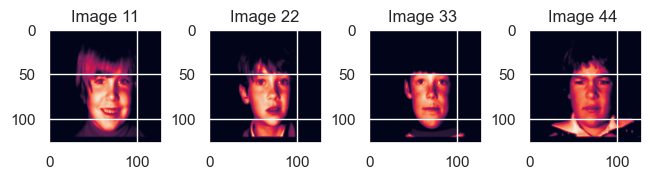

In [64]:
def plot_1_images(data, label="Image 1", ax=None):
    fnShape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fnShape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_4_images(data, ix_1, ix_2, ix_3, ix_4):
    fnShape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1, 4, constrained_layout=True)
    ax[0].imshow(fnShape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fnShape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fnShape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fnShape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    plt.show()
plot_4_images(images,11, 22 , 33, 44)

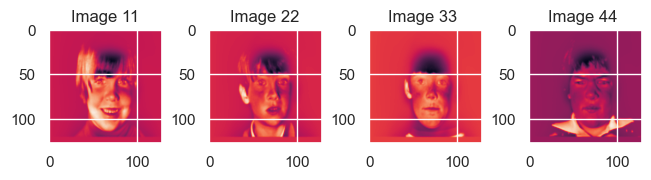

In [65]:
X_mean = images.mean(axis=0)
X_center = images - X_mean
plot_4_images(X_center,11, 22 ,33, 44)

### 3.1 . Calculate the mean face. What is the face with the average of the pixels and visualize it.

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

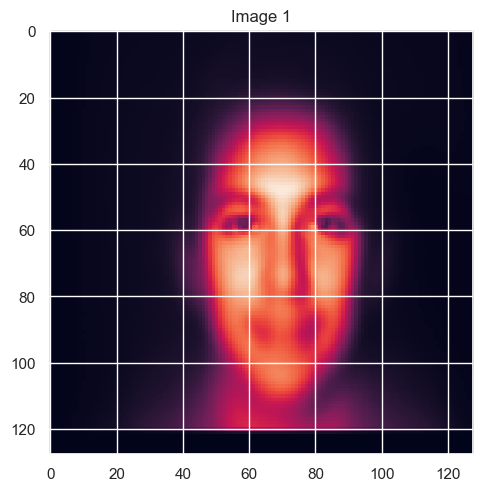

In [49]:
plot_1_images(X_mean)

### 2. Center the data, use PCA. How many components should be used to maintain 90% of the characteristics? Create a table for show the first 5 faces using, the mean face + the data reconstructed using the first component, then with 3 components, then with the first 20 components, then with the components that explain 95% of the variance and finally with the number of components that has 99% of the variance. It can conclude from the results?

In [51]:
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)
eigenValues = pca.explained_variance_
eigenFaces = pca.components_
eigenValues

array([7.32420891e+06, 2.15718453e+06, 1.85813876e+06, 9.75416680e+05,
       8.90129813e+05, 7.89191985e+05, 6.21898507e+05, 4.19131866e+05,
       3.61422714e+05, 2.95051423e+05, 2.28587494e+05, 2.27095623e+05,
       1.94624139e+05, 1.86033651e+05, 1.70286094e+05, 1.57874095e+05,
       1.52472522e+05, 1.44768233e+05, 1.24995062e+05, 1.20067645e+05,
       1.17078293e+05, 1.11845380e+05, 1.04416679e+05, 1.01282734e+05,
       9.52964519e+04, 9.04634310e+04, 8.50867123e+04, 8.11756110e+04,
       7.71613532e+04, 7.37759042e+04, 6.95922083e+04, 6.71508889e+04,
       6.49471813e+04, 6.21272654e+04, 5.94283658e+04, 5.78440982e+04,
       5.48819168e+04, 5.44402291e+04, 5.20407659e+04, 4.99376255e+04,
       4.89796271e+04, 4.74574843e+04, 4.58922426e+04, 4.41544500e+04,
       4.29717864e+04, 4.14701614e+04, 4.09152576e+04, 4.03283111e+04,
       3.73473951e+04, 3.69807547e+04, 3.56148326e+04, 3.44818749e+04,
       3.36401596e+04, 3.33421668e+04, 3.21277065e+04, 3.05690224e+04,
      

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

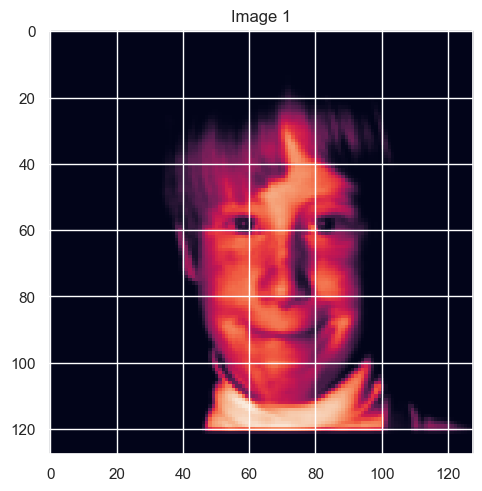

In [53]:
plot_1_images(images[2])

In [54]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigenFaces.shape)
face_1 = np.dot(X_reduced[0].reshape(1,-1),eigenFaces)
print(face_1.sum(axis=0))

Componentes (3993, 200)
Eigenvectores (200, 16384)
[ 4.25984131e-12 -1.88113499e-11 -4.95447412e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [55]:
eigenFaces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigenFaces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

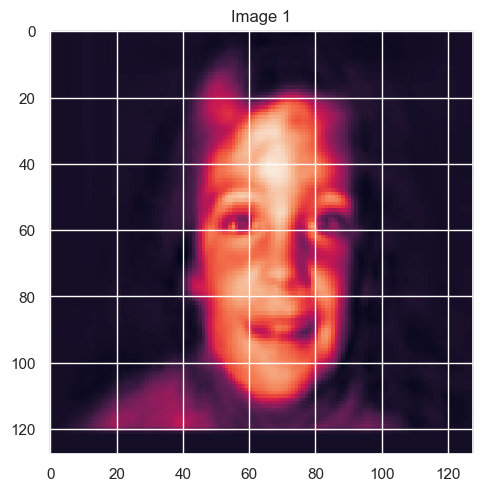

In [56]:
plot_1_images(X_mean + face_1.sum(axis=0) )

(None, <Axes: title={'center': 'with 200 eigenfaces'}>)

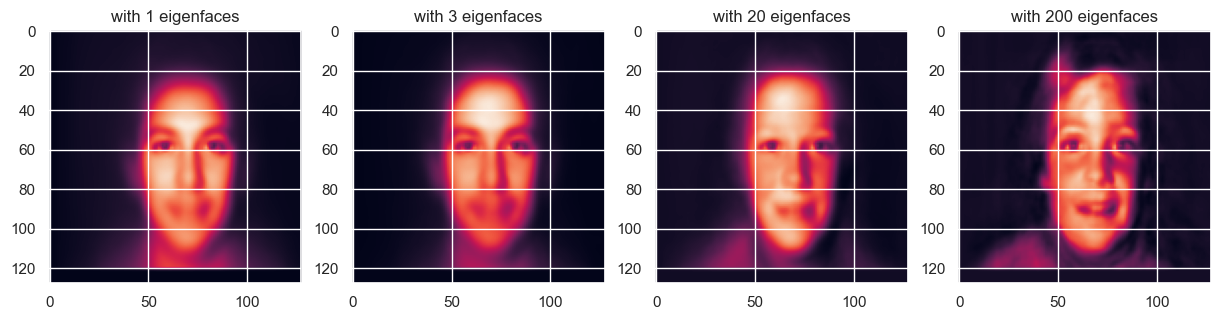

In [42]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:1],
                                 eigenFaces[:1,:]),
                            axis=0)
face_3 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:3],
                                      eigenFaces[:3,:]),
                               axis=0)
face_20 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:20],
                                      eigenFaces[:20,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:200],
                                     eigenFaces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))

#Visualizamos las imagenes
plot_1_images(face_1,ax=ax[0],label="with 1 eigenfaces")
plot_1_images(face_3,ax=ax[1],label="with 3 eigenfaces")
plot_1_images(face_20,ax=ax[2],label="with 20 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="with 200 eigenfaces")

### 95% and 99% variance

In [66]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

In [74]:
n_components_95 = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1
n_components_99 = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1

if len(np.where(explained_variance_ratio_cumulative >= 0.99)[0]) > 0:
    n_components_99 = np.where(explained_variance_ratio_cumulative >= 0.99)[0][0] + 1
else:
    n_components_99 = None

In [76]:
print(f"Components that explain 95%: {n_components_95}")
print(f"Components that explain 99%: {n_components_99}")

Components that explain 95%: 177
Components that explain 99%: None
